***Laboratorio N°2, PARTE 2***

**Laura y Celeste**



***Etapa 1***


1. Carga del archivo JSON

• Cargue el archivo pokemonDB_dataset.json usando la librería json o pandas.

• Explore su estructura inicial (keys(), items()) para entender su jerarquía.

In [1]:
#Importación de las librerias.
import pandas as pd 
import json as json

In [2]:
#Carga del archivo .JSON en un DataFrame de pandas
datos = pd.read_json('pokemonDB_dataset (1).json')
print(datos.head()) #para ver el dataframe
print(datos.columns) #para ver las columnas del dataframe   
print(datos.info()) #para ver la información del dataframe

                                              Abomasnow        Mega Abomasnow  \
Type                                         Grass, Ice            Grass, Ice   
Species                              Frost Tree Pokémon    Frost Tree Pokémon   
Height                                    2.2 m (7′03″)         2.7 m (8′10″)   
Weight                             135.5 kg (298.7 lbs)  185.0 kg (407.9 lbs)   
Abilities  1. Snow Warning, Soundproof (hidden ability)       1. Snow Warning   

                                                        Abra  \
Type                                                 Psychic   
Species                                          Psi Pokémon   
Height                                         0.9 m (2′11″)   
Weight                                    19.5 kg (43.0 lbs)   
Abilities  1. Synchronize, 2. Inner Focus, Magic Guard (h...   

                                                       Absol  \
Type                                                    Dark   


In [3]:
#Para estudiar su jeraquia usamos keys() y items() porque es un diccionario
print(datos.keys())
print(datos.items())


Index(['Abomasnow', 'Mega Abomasnow', 'Abra', 'Absol', 'Mega Absol',
       'Accelgor', 'Aegislash Shield Forme', 'Aegislash Blade Forme',
       'Aerodactyl', 'Mega Aerodactyl',
       ...
       'Galarian Zigzagoon', 'Zoroark', 'Hisuian Zoroark', 'Zorua',
       'Hisuian Zorua', 'Zubat', 'Zweilous', 'Zygarde 50% Forme',
       'Zygarde 10% Forme', 'Zygarde Complete Forme'],
      dtype='object', length=1215)
<generator object DataFrame.items at 0x000002587EEBB790>


2. Revisión de estructura y tipos

• Use df.info() y df.describe(include='all') para identificar tipos de datos.

• Determine cuántas variables son numéricas y cuántas categóricas.

In [4]:
import numpy as np
datos.info()
print(datos.describe(include='all'))
# Clasificación de columnas por tipo
tipos = datos.dtypes
num_vars = tipos[tipos.apply(lambda x: np.issubdtype(x, np.number))].index.tolist()
cat_vars = tipos[tipos == 'object'].index.tolist()

print(f"\n Variables numéricas ({len(num_vars)}): {num_vars}")
print(f" Variables categóricas ({len(cat_vars)}): {cat_vars}")


<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, Type to Speed Max
Columns: 1215 entries, Abomasnow to Zygarde Complete Forme
dtypes: object(1215)
memory usage: 294.5+ KB
       Abomasnow Mega Abomasnow     Abra Absol Mega Absol Accelgor  \
count         31             31       31    31         31       31   
unique        28             25       31    24         24       30   
top          311            132  Psychic   240        240      Bug   
freq           2              2        1     3          3        2   

       Aegislash Shield Forme Aegislash Blade Forme    Aerodactyl  \
count                      31                    31            31   
unique                     24                    24            31   
top                       256                    94  Rock, Flying   
freq                        2                     2             1   

       Mega Aerodactyl  ... Galarian Zigzagoon Zoroark Hisuian Zoroark Zorua  \
count               31  ...                 

In [5]:
datos=datos.transpose() #cada pokemon era un columna, con este comando pasan a ser filas y las caracteristicas columnas.
datos.info()
numericas = datos.select_dtypes(include=['int64', 'float64']).columns #selecciona las columnas numericas
objeto =  datos.select_dtypes(include=['object']).columns #selecciona las columnas tipo object
print(f'Numero de variables numericas: {len(numericas)}')
print(f'Numero de variables categoricas: {len(objeto)}')

<class 'pandas.core.frame.DataFrame'>
Index: 1215 entries, Abomasnow to Zygarde Complete Forme
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Type                  1215 non-null   object
 1   Species               1215 non-null   object
 2   Height                1215 non-null   object
 3   Weight                1215 non-null   object
 4   Abilities             1215 non-null   object
 5   EV Yield              1215 non-null   object
 6   Catch Rate            1215 non-null   object
 7   Base Friendship       1215 non-null   object
 8   Base Exp              1215 non-null   object
 9   Growth Rate           1215 non-null   object
 10  Egg Groups            1215 non-null   object
 11  Gender                1215 non-null   object
 12  Egg Cycles            1215 non-null   object
 13  HP Base               1215 non-null   object
 14  HP Min                1215 non-null   object
 15  HP Max           

3. Limpieza y conversión de campos

Convierta columnas como "Height", "Weight", "HP Base", "Attack Base", "Defense Base", etc., a valores numéricos.

Elimine unidades (“m”, “kg”, “lbs”) y convierta los campos a tipo float.

Separe las columnas compuestas, por ejemplo:

"Type" → Type1, Type2

"Gender" → Male (%), Female (%)

In [6]:
# Limpieza y conversion
unidades = {'Height': ['m'], 'Weight': ['kg', 'lbs']}
for col, sufijos in unidades.items():
    if col in datos.columns:
        for suf in sufijos:
            datos[col] = datos[col].astype(str).str.replace(suf, '', regex=False)
        datos[col] = pd.to_numeric(datos[col], errors='coerce')

# Conversion a float
columnas_numericas = ['HP Base', 'Attack Base', 'Defense Base', 'Sp. Atk Base', 'Sp. Def Base', 'Speed Base']
for col in columnas_numericas:
    if col in datos.columns:
        datos[col] = pd.to_numeric(datos[col], errors='coerce')

# Separacion columna 'Type' (Type1 y Type2)
if 'Type' in datos.columns:
    type_split = datos['Type'].astype(str).str.split(',', expand=True)
    datos['Type1'] = type_split[0].str.strip()
    datos['Type2'] = type_split[1].str.strip() if type_split.shape[1] > 1 else None

# Separacion columna 'Gender' (Male (%) y Female (%))
if 'Gender' in datos.columns:
    gender_split = datos['Gender'].astype(str).str.replace('%', '', regex=False).str.split(',', expand=True)
    datos['Male (%)'] = pd.to_numeric(gender_split[0].str.strip(), errors='coerce')
    datos['Female (%)'] = pd.to_numeric(gender_split[1].str.strip(), errors='coerce') if gender_split.shape[1] > 1 else None
print(datos.head())
print(datos.info())


                      Type             Species  Height  Weight  \
Abomasnow       Grass, Ice  Frost Tree Pokémon     NaN     NaN   
Mega Abomasnow  Grass, Ice  Frost Tree Pokémon     NaN     NaN   
Abra               Psychic         Psi Pokémon     NaN     NaN   
Absol                 Dark    Disaster Pokémon     NaN     NaN   
Mega Absol            Dark    Disaster Pokémon     NaN     NaN   

                                                        Abilities  \
Abomasnow            1. Snow Warning, Soundproof (hidden ability)   
Mega Abomasnow                                    1. Snow Warning   
Abra            1. Synchronize, 2. Inner Focus, Magic Guard (h...   
Absol           1. Pressure, 2. Super Luck, Justified (hidden ...   
Mega Absol                                        1. Magic Bounce   

                           EV Yield                          Catch Rate  \
Abomasnow       1 Attack, 1 Sp. Atk    60 (7.8% with PokéBall, full HP)   
Mega Abomasnow  1 Attack, 1 Sp. Atk   

4. Normalización y verificación final

• Verifique valores nulos y duros:

•Cree un nuevo DataFrame df_clean con los campos limpios listos para análisis:

["Type1", "Type2", "HP Base", "Attack Base", "Defense Base", "Speed Base", "Height_m", "Weight_kg", "Base Exp"]

In [7]:
datos.rename(columns={'Height': 'Height_m', 'Weight': 'Weight_kg'}, inplace=True)
#nuevo dataframe con los campos limpios
campos_limpios = ["Type1", "Type2", "HP Base", "Attack Base", "Defense Base", "Speed Base", "Height_m", "Weight_kg", "Base Exp"]
df_clean = datos[campos_limpios].copy()
print(df_clean.isnull().sum())
print(df_clean.describe())


Type1              0
Type2            546
HP Base            0
Attack Base        0
Defense Base       0
Speed Base         0
Height_m        1215
Weight_kg       1215
Base Exp           0
dtype: int64
           HP Base  Attack Base  Defense Base   Speed Base  Height_m  \
count  1215.000000  1215.000000   1215.000000  1215.000000       0.0   
mean     71.244444    81.152263     75.007407    70.034568       NaN   
std      26.927819    32.037134     30.740999    30.161298       NaN   
min       1.000000     5.000000      5.000000     5.000000       NaN   
25%      52.000000    57.000000     52.000000    45.000000       NaN   
50%      70.000000    80.000000     70.000000    68.000000       NaN   
75%      85.000000   100.000000     91.000000    91.000000       NaN   
max     255.000000   190.000000    250.000000   200.000000       NaN   

       Weight_kg  
count        0.0  
mean         NaN  
std          NaN  
min          NaN  
25%          NaN  
50%          NaN  
75%          NaN

***Etapa 2***

1. Análisis estadístico:

¿Cuál es el promedio, mínimo y máximo de los atributos base (HP, Attack, Defense, Speed) de todos los Pokémon?

In [8]:
atributos_base = ['HP Base', 'Attack Base', 'Defense Base', 'Speed Base']
# Calculo promedio, mínimo y máximo
estadisticas = datos[atributos_base].agg(['mean', 'min', 'max'])
print("\n Estadísticas de atributos base (HP, Attack, Defense, Speed):")
print(estadisticas)


 Estadísticas de atributos base (HP, Attack, Defense, Speed):
         HP Base  Attack Base  Defense Base  Speed Base
mean   71.244444    81.152263     75.007407   70.034568
min     1.000000     5.000000      5.000000    5.000000
max   255.000000   190.000000    250.000000  200.000000


2. Análisis gráfico:

Cree un histograma para visualizar la distribución de los valores de Base Exp. Interprete si la distribución es simétrica o sesgada.

In [9]:
#librerias
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('petroff10') #Estilo de la grafica 

Text(0.5, 1.0, 'Distribucion de base Exp')

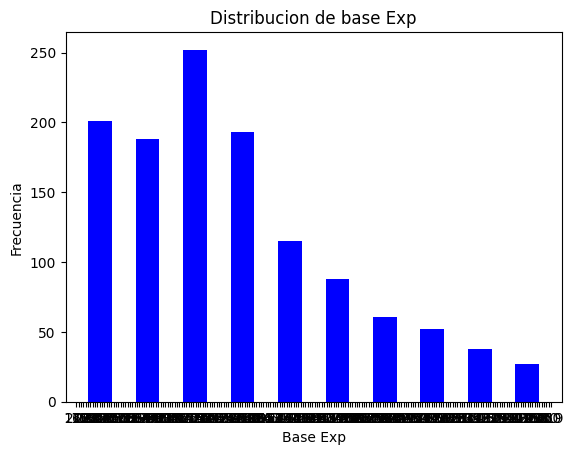

In [15]:

plt.hist(datos['Base Exp'], rwidth=0.5, color='blue')
plt.Figure(figsize=(10,6))
plt.xlabel('Base Exp')
plt.ylabel('Frecuencia')
plt.title('Distribucion de base Exp')

3. Análisis gráfico:

Realice un boxplot comparando los valores de Attack Base entre los tipos principales (Type1). Identifique qué tipo tiene Pokémon con ataques más altos en promedio.

C:\Users\USER\AppData\Local\Temp\ipykernel_12484\3725043957.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos, x="Type1", y="Attack Base", palette="Set3")


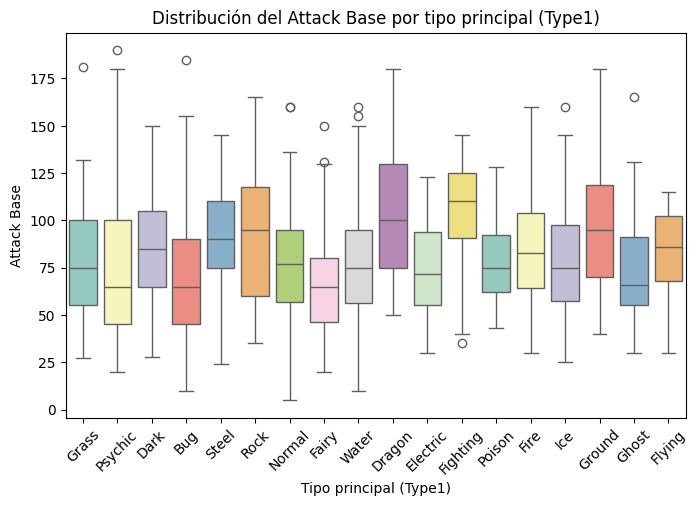

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=datos, x="Type1", y="Attack Base", palette="Set3")
plt.title("Distribución del Attack Base por tipo principal (Type1)")
plt.xlabel("Tipo principal (Type1)")
plt.ylabel("Attack Base")
plt.xticks(rotation=45)
plt.show()

4. ¿Cuál es el top 5 de especies (Species) más frecuentes en el dataset?

In [12]:
#TOP 5 
top_5 = datos['Species'].value_counts().head(5)
print("Top 5 especies más frecuentes:")
print(top_5)

Top 5 especies más frecuentes:
Species
Paradox Pokémon    22
Mouse Pokémon      14
Fox Pokémon         9
Dragon Pokémon      9
Pumpkin Pokémon     8
Name: count, dtype: int64


5. Genere un gráfico de barras que muestre la cantidad de Pokémon por tipo principal (Type1). ¿Qué tipo es el más común?

Tipo más común: Water con 150 Pokémon


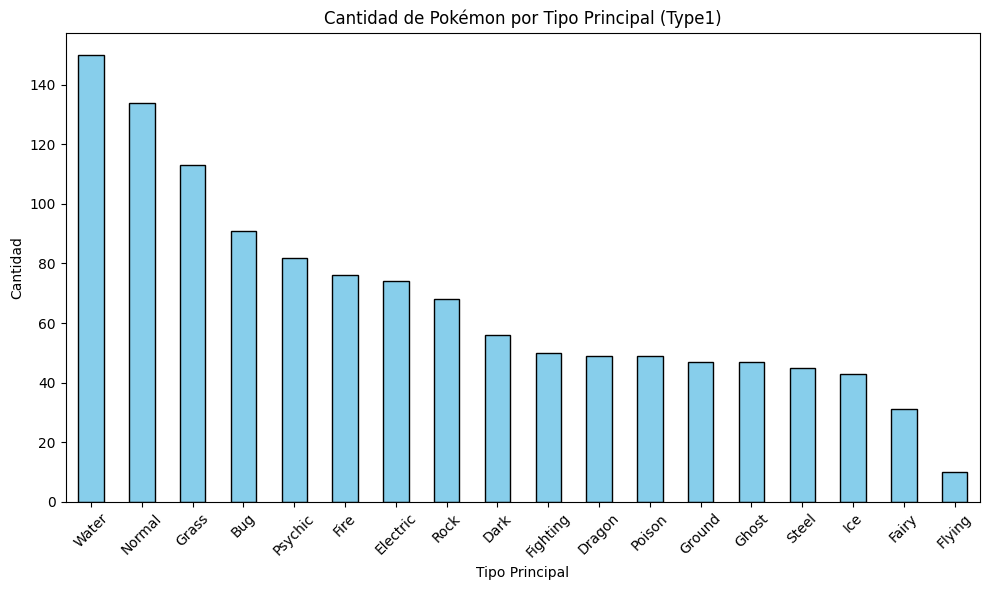

In [13]:
type_counts = datos['Type1'].value_counts()

# Mostrar el tipo más común
print("Tipo más común:", type_counts.idxmax(), "con", type_counts.max(), "Pokémon")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cantidad de Pokémon por Tipo Principal (Type1)')
plt.xlabel('Tipo Principal')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6. Análisis estadístico:

Calcule la correlación entre los atributos HP Base, Attack Base, Defense Base y Speed Base. ¿Qué atributos están más correlacionados entre sí?

In [20]:

features = ['HP Base', 'Attack Base', 'Defense Base', 'Speed Base']
for col in features:
    if col in datos.columns:
        datos[col] = pd.to_numeric(datos[col], errors='coerce')


df_nuevo = datos[features].dropna()

correlacion = df_nuevo.corr()
print(correlacion)

               HP Base  Attack Base  Defense Base  Speed Base
HP Base       1.000000     0.461580      0.332312    0.181531
Attack Base   0.461580     1.000000      0.468231    0.375532
Defense Base  0.332312     0.468231      1.000000    0.017904
Speed Base    0.181531     0.375532      0.017904    1.000000


7. Análisis gráfico:

Cree un heatmap (mapa de calor) con la matriz de correlaciones obtenida en el punto anterior. Interprete los resultados.

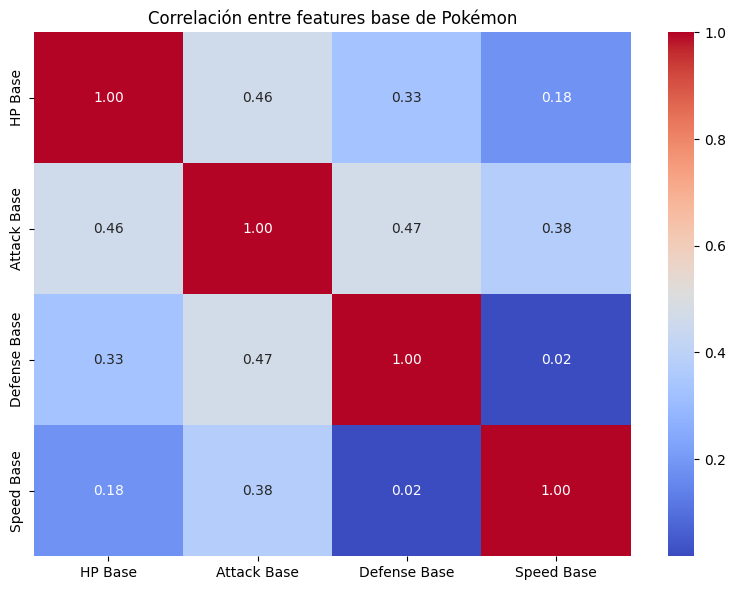

In [21]:
# mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre features base de Pokémon')
plt.tight_layout()
plt.show()

8. Análisis gráfico:

Realice un diagrama de dispersión (scatter plot) entre Weight_kg y Attack Base. ¿Existe relación entre el peso de un Pokémon y su capacidad de ataque?

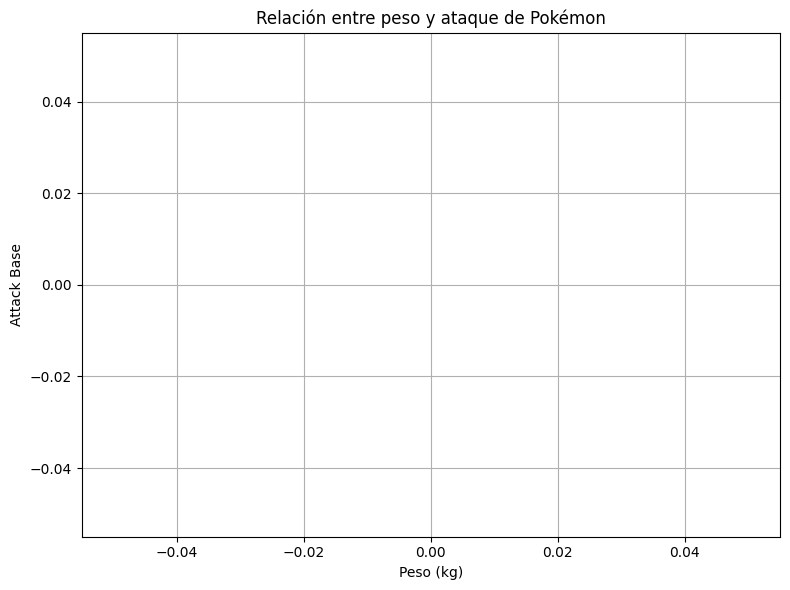

In [31]:
datos['Weight_kg'] = datos['Weight_kg'].astype(str).str.replace('kg', '', regex=False).str.replace('lbs', '', regex=False)
datos['Weight_kg'] = pd.to_numeric(datos['Weight_kg'], errors='coerce')
datos['Attack Base'] = pd.to_numeric(datos['Attack Base'], errors='coerce')

df_plot = datos[['Weight_kg', 'Attack Base']].dropna()

# scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_plot['Weight_kg'], df_plot['Attack Base'], alpha=0.6, color='darkorange', edgecolors='black')
plt.title('Relación entre peso y ataque de Pokémon')
plt.xlabel('Peso (kg)')
plt.ylabel('Attack Base')
plt.grid(True)
plt.tight_layout()
plt.show()

9. Análisis estadístico: 

Determine el promedio de altura y peso por tipo principal (Type1). Interprete cuál tipo tiende a tener Pokémon más grandes.

In [33]:
datos['Height_m'] = pd.to_numeric(datos.get('Height_m', pd.Series()), errors='coerce')
datos['Weight_kg'] = pd.to_numeric(datos.get('Weight_kg', pd.Series()), errors='coerce')
promedios = datos.groupby('Type1')[['Height_m', 'Weight_kg']].mean().sort_values(by='Weight_kg', ascending=False)
print(promedios)

          Height_m  Weight_kg
Type1                        
Bug            NaN        NaN
Dark           NaN        NaN
Dragon         NaN        NaN
Electric       NaN        NaN
Fairy          NaN        NaN
Fighting       NaN        NaN
Fire           NaN        NaN
Flying         NaN        NaN
Ghost          NaN        NaN
Grass          NaN        NaN
Ground         NaN        NaN
Ice            NaN        NaN
Normal         NaN        NaN
Poison         NaN        NaN
Psychic        NaN        NaN
Rock           NaN        NaN
Steel          NaN        NaN
Water          NaN        NaN


10. Análisis gráfico:

Construya un gráfico de violín o boxplot múltiple comparando el atributo Speed Base entre los tipos Flying, Electric y Ground. ¿Qué tipo de Pokémon tiende a ser más rápido?

C:\Users\USER\AppData\Local\Temp\ipykernel_12484\2790269778.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type1', y='Speed Base', data=df_violin, palette='rocket')


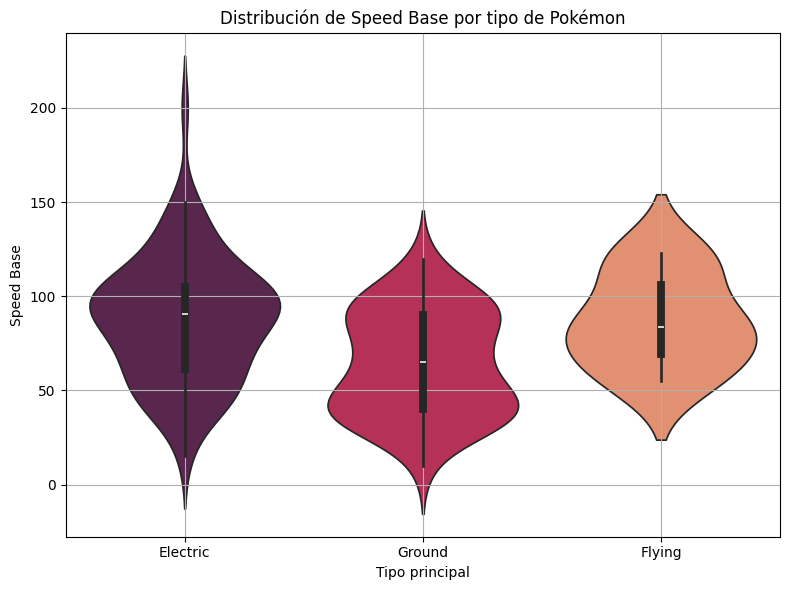

In [40]:
# Separar tipos si es necesario
if 'Type' in datos.columns:
    datos[['Type1', 'Type2']] = datos['Type'].str.split(',', expand=True)
    datos['Type1'] = datos['Type1'].str.strip()

# Convertir Speed Base a numérico
datos['Speed Base'] = pd.to_numeric(datos.get('Speed Base', pd.Series()), errors='coerce')

# Filtrar solo los tipos deseados
tipos_deseados = ['Flying', 'Electric', 'Ground']
df_violin = datos[datos['Type1'].isin(tipos_deseados)][['Type1', 'Speed Base']].dropna()

# Crear gráfico de violín
plt.figure(figsize=(8, 6))
sns.violinplot(x='Type1', y='Speed Base', data=df_violin, palette='rocket')
plt.title('Distribución de Speed Base por tipo de Pokémon')
plt.xlabel('Tipo principal')
plt.ylabel('Speed Base')
plt.grid(True)
plt.tight_layout()
plt.show()